In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
interictal_features_train = np.load('./interictal_train.npy')
preictal_features_train = np.load('./preictal_train.npy')
print(interictal_features_train.shape)
print(preictal_features_train.shape)

(1377, 23, 2)
(1377, 23, 2)


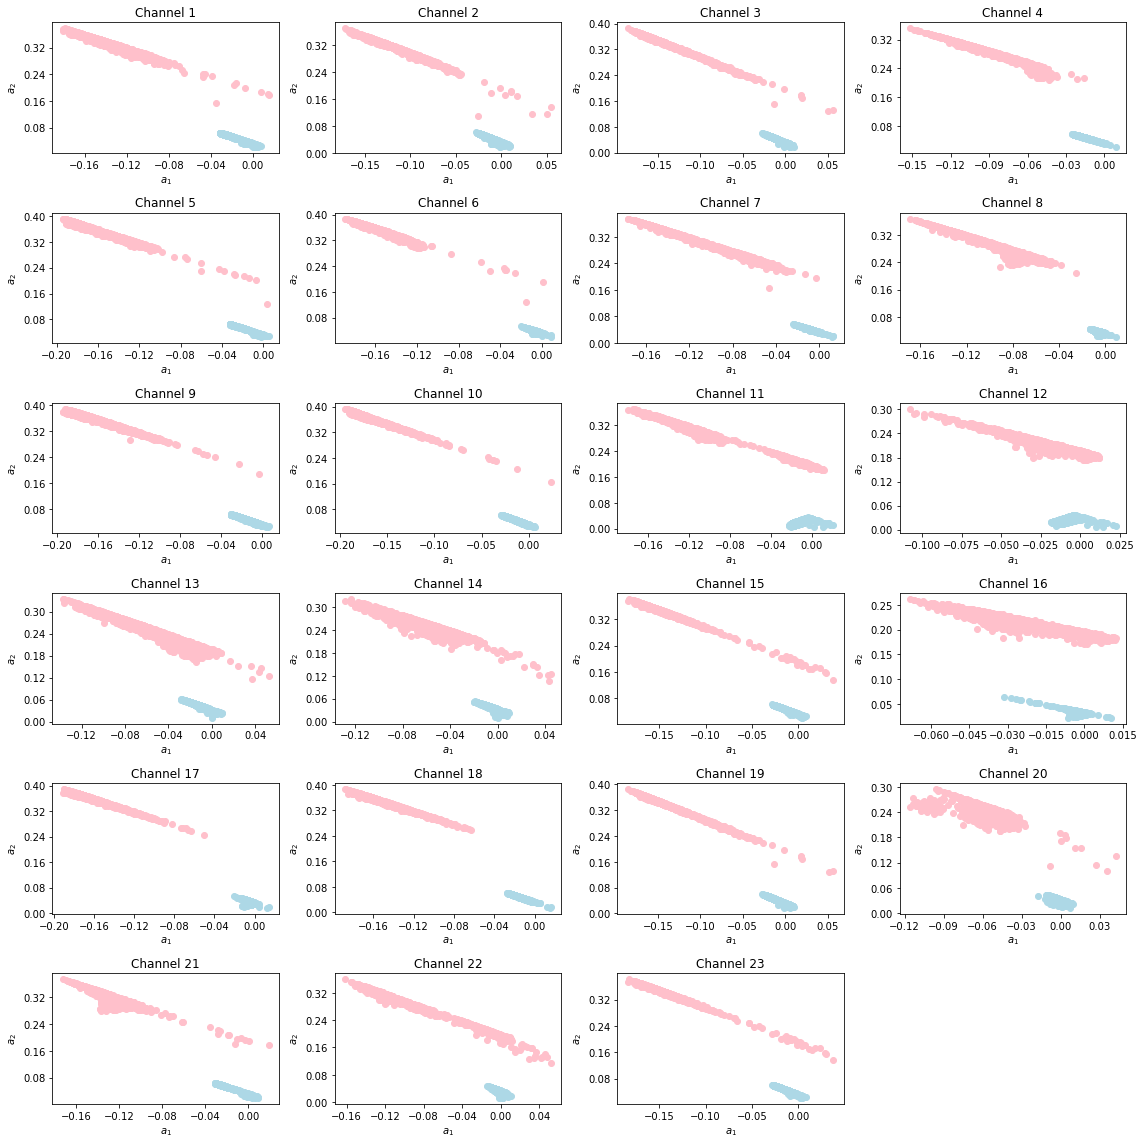

In [125]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(16,16), gridspec_kw={'width_ratios': [3,3,3,3]})
axes = np.ravel(axes)
for i in range(len(axes)-1):
    x_1 = interictal_features_train[:, i, 0]
    y_1 = interictal_features_train[:, i, 1]
    axes[i].scatter(x_1[x_1!=0], y_1[y_1!=0], color='lightblue', alpha=1.)
    axes[i].xaxis.set_major_locator(plt.MaxNLocator(6))
    axes[i].yaxis.set_major_locator(plt.MaxNLocator(6))
    
    x_2 = preictal_features_train[:, i, 0]
    y_2 = preictal_features_train[:, i, 1]
    axes[i].scatter(x_2[x_2!=0], y_2[y_2!=0], color='pink', alpha=1.)
    
    axes[i].set_title(f'Channel {i+1}')
    axes[i].set_xlabel(r'$a_1$')
    axes[i].set_ylabel(r'$a_2$')
fig.delaxes(axes[-1]) # remove the last empty plot
plt.tight_layout()
plt.savefig('../figures/classification/train_features_all_ch.pdf')
plt.show()

In [26]:
interictal_features_train.shape

(1377, 23, 2)

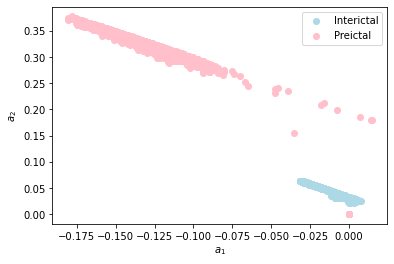

In [29]:
interictal_a1 = interictal_features_train[:, 0, 0] # blue a1
interictal_a2 = interictal_features_train[:, 0, 1] # blue a2

preictal_a1 = preictal_features_train[:, 0, 0] # pink a1
preictal_a2 = preictal_features_train[:, 0, 1] # pink a2

plt.figure()
plt.scatter(interictal_a1, interictal_a2, color='lightblue', label='Interictal')
plt.scatter(preictal_a1, preictal_a2, color='pink', label='Preictal')
plt.xlabel('$a_1$')
plt.ylabel('$a_2$')

plt.legend()
plt.show()

Text(0, 0.5, '$a_1$')

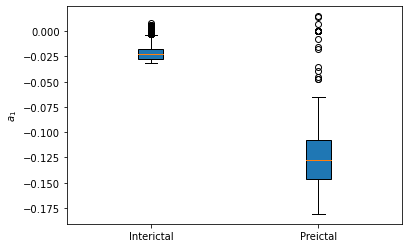

In [36]:
bplot1 = plt.boxplot([interictal_a1, preictal_a1], patch_artist=True)
plt.xticks([1, 2], ['Interictal', 'Preictal'])
plt.ylabel('$a_1$')

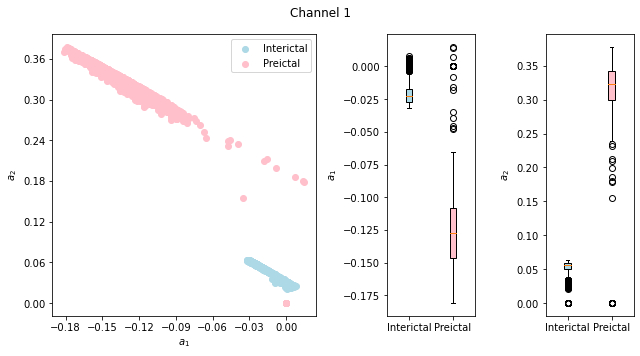

In [38]:
# visualise boxplots for channel 1
interictal_a1 = interictal_features_train[:, 0, 0] # blue a1
interictal_a2 = interictal_features_train[:, 0, 1] # blue a2

preictal_a1 = preictal_features_train[:, 0, 0] # pink a1
preictal_a2 = preictal_features_train[:, 0, 1] # pink a2

fig, axes = plt.subplots(ncols=3, figsize=(9,5), gridspec_kw={'width_ratios': [3,1,1]})
axes[0].scatter(interictal_a1, interictal_a2, color='lightblue', alpha=1., label='Interictal')
axes[0].scatter(preictal_a1, preictal_a2, color='pink', alpha=1., label='Preictal')
axes[0].set_xlabel('$a_1$')
axes[0].set_ylabel('$a_2$')
axes[0].xaxis.set_major_locator(plt.MaxNLocator(8))
axes[0].yaxis.set_major_locator(plt.MaxNLocator(8))
axes[0].legend(loc=1)

bplot1 = axes[1].boxplot([interictal_a1, preictal_a1], patch_artist=True)
axes[1].set_xticklabels(['Interictal', 'Preictal'])
axes[1].set_ylabel('$a_1$')

bplot2 = axes[2].boxplot([interictal_a2, preictal_a2], patch_artist=True)
axes[2].set_xticklabels(['Interictal', 'Preictal'])
axes[2].set_ylabel('$a_2$')

colors = ['lightblue', 'pink']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

fig.suptitle('Channel 1')
plt.tight_layout()
plt.savefig('../figures/classification/train_features_ch1.pdf')
plt.show()

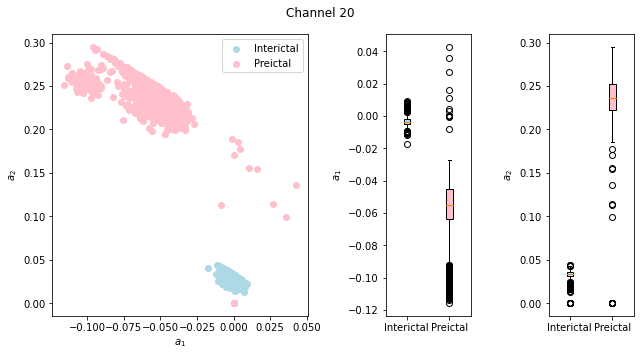

In [39]:
# visualise boxplots for channel 20
ch = 19
interictal_a1 = interictal_features_train[:, ch, 0] # blue a1
interictal_a2 = interictal_features_train[:, ch, 1] # blue a2

preictal_a1 = preictal_features_train[:, ch, 0] # pink a1
preictal_a2 = preictal_features_train[:, ch, 1] # pink a2

fig, axes = plt.subplots(ncols=3, figsize=(9,5), gridspec_kw={'width_ratios': [3,1,1]})
axes[0].scatter(interictal_a1, interictal_a2, color='lightblue', alpha=1., label='Interictal')
axes[0].scatter(preictal_a1, preictal_a2, color='pink', alpha=1., label='Preictal')
axes[0].set_xlabel('$a_1$')
axes[0].set_ylabel('$a_2$')
axes[0].xaxis.set_major_locator(plt.MaxNLocator(8))
axes[0].yaxis.set_major_locator(plt.MaxNLocator(8))
axes[0].legend(loc=1)

bplot1 = axes[1].boxplot([interictal_a1, preictal_a1], patch_artist=True)
axes[1].set_xticklabels(['Interictal', 'Preictal'])
axes[1].set_ylabel('$a_1$')

bplot2 = axes[2].boxplot([interictal_a2, preictal_a2], patch_artist=True)
axes[2].set_xticklabels(['Interictal', 'Preictal'])
axes[2].set_ylabel('$a_2$')

colors = ['lightblue', 'pink']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

fig.suptitle(f'Channel {ch+1}')
plt.tight_layout()
plt.savefig('../figures/classification/train_features_ch20.pdf')
plt.show()

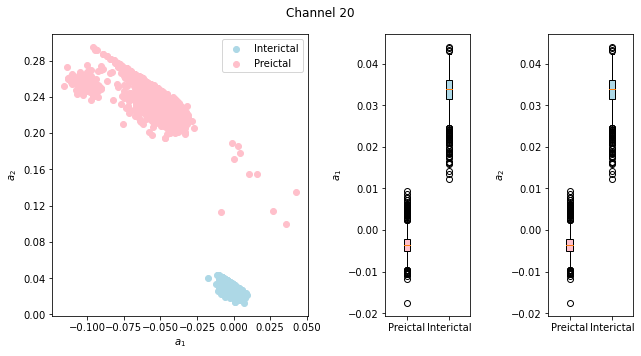

In [132]:
# visualise boxplots for channel 20 (contains errors)
x = interictal_features_train[:, 19, 0]
y = interictal_features_train[:, 19, 1]
x_p = preictal_features_train[:, 19, 0]
y_p = preictal_features_train[:, 19, 1]

x_1 = interictal_features_train[:, 19, 0]
y_1 = preictal_features_train[:, 19, 0]

x_2 = interictal_features_train[:, 19, 1]
y_2 = preictal_features_train[:, 19, 1]

fig, axes = plt.subplots(ncols=3, figsize=(9,5), gridspec_kw={'width_ratios': [3,1,1]})
axes[0].scatter(x[x!=0], y[y!=0], color='lightblue', alpha=1., label='Interictal')
axes[0].scatter(x_p[x_p!=0], y_p[y_p!=0], color='pink', alpha=1., label='Preictal')
axes[0].set_xlabel('$a_1$')
axes[0].set_ylabel('$a_2$')
axes[0].xaxis.set_major_locator(plt.MaxNLocator(8))
axes[0].yaxis.set_major_locator(plt.MaxNLocator(8))
axes[0].legend(loc=1)

bplot1 = axes[1].boxplot([x_1[x_1!=0], x_2[x_2!=0]], patch_artist=True)
axes[1].set_xticklabels(['Preictal', 'Interictal'])
axes[1].set_ylabel('$a_1$')

bplot2 = axes[2].boxplot([x_1[x_1!=0], x_2[x_2!=0]], patch_artist=True)
axes[2].set_xticklabels(['Preictal', 'Interictal'])
axes[2].set_ylabel('$a_2$')

colors = ['pink', 'lightblue']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

fig.suptitle('Channel 20')
plt.tight_layout()
plt.savefig('../figures/classification/train_features_ch20.pdf')
plt.show()